In [1]:

from collections import defaultdict
from dimod import SimulatedAnnealingSampler
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivatives
def f(x):
    return np.sin(2*np.pi*x)

def f_prime_norm(x):
    return np.cos(2*np.pi*x)

def f_second_norm(x):
    return -np.sin(2*np.pi*x)


# def f_second(x):
#     return -4 * (np.pi**2) * np.sin(2 * np.pi * x) -64 * (np.pi**2) *np.cos(8*np.pi*x)

# def f_second_norm(x):
#     res = f_second(x)
#     return res/np.max(abs(res))

# Initial uniform mesh
x_initial = np.linspace(-1, 1, 20)
x_tot = np.linspace(-1, 1, 50)
y_initial = f(x_initial)
# x_mid = np.zeros(9)
# for i in range(9):
#     x_mid[i] = (x_initial[i]+x_initial[i+1])/2


# Initialize our Q matrix
Q = defaultdict(int)

F=40
beta = 1
alpha = 1
#Define the Q matrix
for i in range(50):
    Q[(i,i)] = -2*abs(f_prime_norm(x_tot[i]))-4*abs(f_second_norm(x_tot[i]))+beta*(1-2*F)
    # if i == 0 or i == 49:
    #     Q[(i,i)] = Q[(i,i)]-40
    for j in range(50):
        if i != j and i<j :
            Q[(i,j)] = 2*beta + alpha*1/abs(x_tot[i]-x_tot[j])/25

print(Q)


defaultdict(<class 'int'>, {(0, 0): np.float64(-81.0), (0, 1): np.float64(2.9799999999999986), (0, 2): np.float64(2.49), (0, 3): np.float64(2.3266666666666667), (0, 4): np.float64(2.245), (0, 5): np.float64(2.196), (0, 6): np.float64(2.163333333333333), (0, 7): np.float64(2.14), (0, 8): np.float64(2.1225), (0, 9): np.float64(2.108888888888889), (0, 10): np.float64(2.098), (0, 11): np.float64(2.089090909090909), (0, 12): np.float64(2.0816666666666666), (0, 13): np.float64(2.0753846153846154), (0, 14): np.float64(2.07), (0, 15): np.float64(2.0653333333333332), (0, 16): np.float64(2.06125), (0, 17): np.float64(2.0576470588235294), (0, 18): np.float64(2.0544444444444445), (0, 19): np.float64(2.051578947368421), (0, 20): np.float64(2.049), (0, 21): np.float64(2.046666666666667), (0, 22): np.float64(2.0445454545454544), (0, 23): np.float64(2.042608695652174), (0, 24): np.float64(2.0408333333333335), (0, 25): np.float64(2.0392), (0, 26): np.float64(2.037692307692308), (0, 27): np.float64(2.03

In [2]:

# Define the sampler that will be used to run the problem
#sampler = EmbeddingComposite(DWaveSampler())
# Instantiate the sampler
sampler = SimulatedAnnealingSampler()

# Run the problem on the sampler and print the results
sampleset = sampler.sample_qubo(Q,
                                 num_reads = 100)
#print(sampleset) #prints energy, number of occurencies and 
result = sampleset.first.sample #lowest energy sample

#print(first)
#for k in range(9):
    #print(result[k])

x_adapt = [x_tot[k] for k in range(len(x_tot)) if result[k] == 1]

print(x_initial)
print(x_adapt)


[-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]
[np.float64(-0.9591836734693877), np.float64(-0.9183673469387755), np.float64(-0.8775510204081632), np.float64(-0.8367346938775511), np.float64(-0.7959183673469388), np.float64(-0.7551020408163265), np.float64(-0.7142857142857143), np.float64(-0.6734693877551021), np.float64(-0.6326530612244898), np.float64(-0.5918367346938775), np.float64(-0.4285714285714286), np.float64(-0.3877551020408164), np.float64(-0.34693877551020413), np.float64(-0.30612244897959184), np.float64(-0.22448979591836737), np.float64(-0.1836734693877552), np.float64(-0.1428571428571429), np.float64(-0.10204081632653073), np.float64(-0.061224489795918435), np.float64(0.06122448979591821), np.float64(0.1020408163265305), np.float64(0.1428571428571428), np.float64(0.18367346938

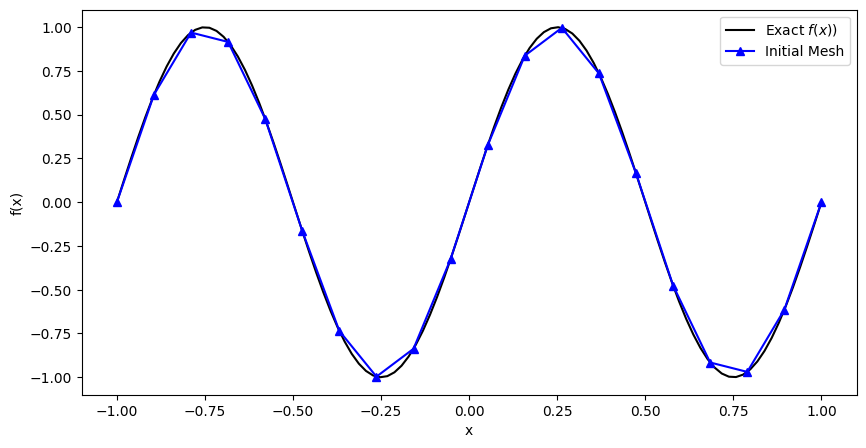

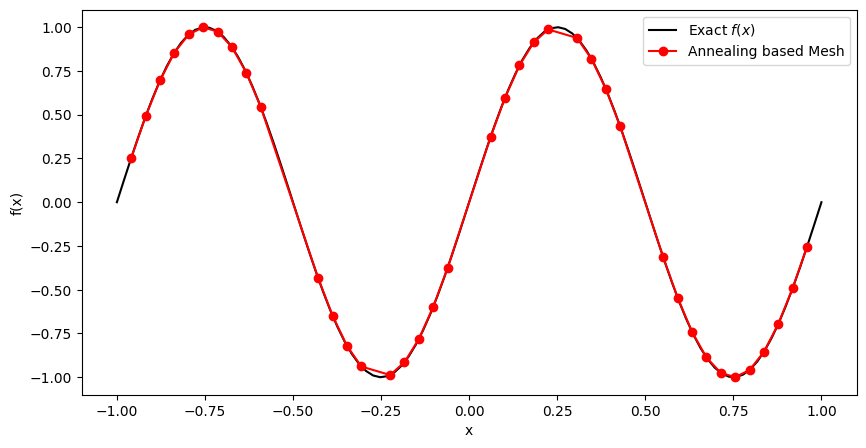

In [3]:

y_adaptive = f(np.array(x_adapt))
# Plotting the initial and adapted meshes
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-1, 1, 100), f(np.linspace(-1, 1, 100)), 'k-', label="Exact $f(x))$")
plt.plot(x_initial, y_initial, 'b^-', label="Initial Mesh")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-1, 1, 100), f(np.linspace(-1, 1, 100)), 'k-', label="Exact $f(x)$")
plt.plot(x_adapt, y_adaptive, 'ro-', label="Annealing based Mesh")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

